In [3]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import (r2_score, mean_squared_error, 
              root_mean_squared_error, mean_absolute_error)

In [9]:
# Load dataset 
train = pd.read_csv("./train.csv")

In [11]:
# Explore first rows
train.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950


In [10]:
# Dataset shape
train.shape

(800, 10)

In [12]:
# Columns
train.columns

Index(['credit_score', 'income', 'loan_amount', 'loan_term', 'interest_rate',
       'debt_to_income_ratio', 'employment_years', 'savings_balance', 'age',
       'default_risk_score'],
      dtype='object')

In [13]:
# Data types and non-null rows 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB


In [14]:
# Null values 
train.isna().sum()

credit_score            0
income                  0
loan_amount             0
loan_term               0
interest_rate           0
debt_to_income_ratio    0
employment_years        0
savings_balance         0
age                     0
default_risk_score      0
dtype: int64

In [18]:
# Duplicate rows
train.duplicated().sum()

0

In [20]:
# Summary
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit_score,800.0,565.405000,159.528109,300.00000,426.750000,553.000000,702.000000,849.000000
income,800.0,85779.287500,37972.705711,20060.00000,53056.250000,85105.000000,118776.000000,149972.000000
loan_amount,800.0,27795.651250,12819.525021,5097.00000,16136.000000,28518.500000,38539.750000,49976.000000
loan_term,800.0,36.315000,17.163012,12.00000,24.000000,36.000000,48.000000,60.000000
interest_rate,800.0,8.732238,3.670453,2.51000,5.537500,8.725000,11.915000,14.990000
debt_to_income_ratio,800.0,29.812500,11.626346,10.00000,19.925000,29.645000,40.005000,49.910000
employment_years,800.0,16.376250,10.036339,0.00000,8.000000,16.000000,25.000000,34.000000
savings_balance,800.0,48850.921250,29785.455545,28.00000,21359.750000,47314.500000,76191.000000,99976.000000
age,800.0,42.443750,15.011446,18.00000,29.000000,42.000000,55.250000,69.000000
default_risk_score,800.0,4529.968687,2567.048232,49.75794,2377.592064,4379.666025,6821.026905,9113.843128


## EDA

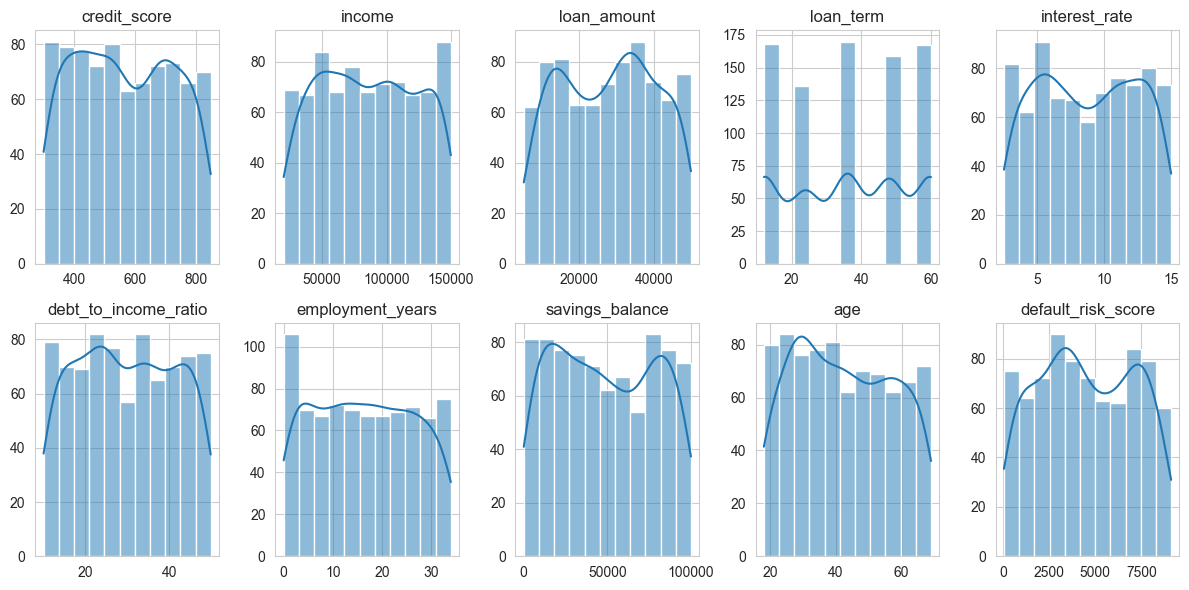

In [32]:
# Data distribution
sns.set_style('whitegrid')

cols = list(train.columns)

fig, axs = plt.subplots(2,5, figsize=(12,6))
for i, col in enumerate(cols):
    row = i //5
    col_idx = i % 5
    sns.histplot(train[col], ax= axs[row, col_idx], kde= True)
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].set_xlabel('')
    axs[row, col_idx].set_ylabel('')
plt.tight_layout()

plt.show()

<p> The histograms show that none of the variables is normally or near-normally distributed
Therefore: Use MinMax scaling if required; explore log transformation of predictors and outcome.
There doesn't seem to be any outliers in the data.
<p/>

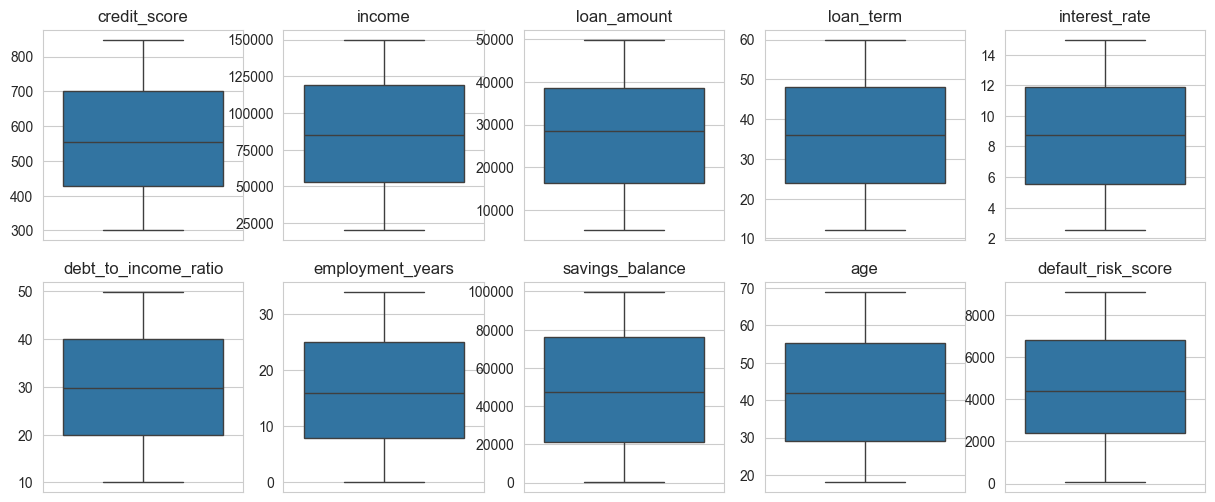

In [30]:
# Outliers
fig, axs = plt.subplots(2,5, figsize=(15,6))
for i, col in enumerate(cols):
    row = i // 5
    col_idx = i % 5
    sns.boxplot(train[col], ax= axs[row, col_idx])
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].set_ylabel('')

plt.show()